                     NAME : SHRI SAI SADHANA NATARAJAN (50247664)

            TEAMMATE NAME : SOUMYA VENKATESAN    (50246599) 

In [7]:
def get_first_last_name(s):
    INVALID_NAME_PARTS = ["mr ", "ms ", "mrs",
        "dr ", "jr ", "sir "]
    parts = s.lower().replace(".","").strip().split()
    parts = [p for p in parts
        if p not in INVALID_NAME_PARTS]
    if len(parts)==0:
        raise ValueError(
             "Name %s is formatted wrong " % s)
    first, last = parts[0], parts[-1]
    first = first[0].upper() + first[1:]
    last = last[0].upper() + last[1:]
    return first, last
def format_age(s):
    chars = list(s) # list of characters
    digit_chars = [c for c in chars if c.isdigit()]
    return int("".join(digit_chars))
def format_date(s):
    MONTH_MAP = {
        "jan": "01", "feb": "02", "may": "03"}
    s = s.strip().lower().replace(",", "")
    m, d, y = s.split()
    if len(y) == 2: y = "19" + y
    if len(d) == 1: d = "0" + d
    return y + "-" + MONTH_MAP[m[:3]] + "-" + d

import pandas as pd
df = pd.read_csv("C:\\Users\\Soumya V\\Desktop\\file.tsv", sep="|")
df["First Name"] = df["Name"].apply(
    lambda s: get_first_last_name(s)[0])
df["Last Name"] = df["Name"].apply(
    lambda s: get_first_last_name(s)[1])
df["Age"] = df["Age"].apply(format_age)
df["Birthdate"] = df["Birthdate"].apply(
    format_date).astype(pd.datetime)
print df

                Name  Age   Birthdate First Name Last Name
0  Ms. Janice Joplin   65  1943-01-19         Ms    Joplin
1         Bob Dylan    74  1941-03-24        Bob     Dylan
2     Billy Ray Joel   66  1941-02-09      Billy      Joel


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

# Loading data

def get_iris_df():
  ds = sklearn.datasets.load_iris()
  df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
  code_species_map = dict(zip(
    range(3), ds['target_names']))
  df['species'] = [code_species_map[c]
    for c in ds['target']]
  return df
df = get_iris_df()

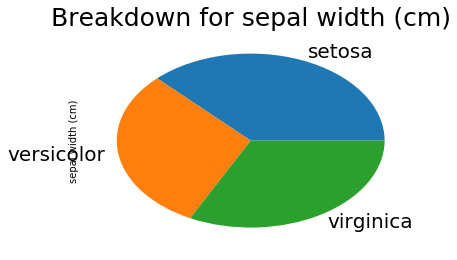

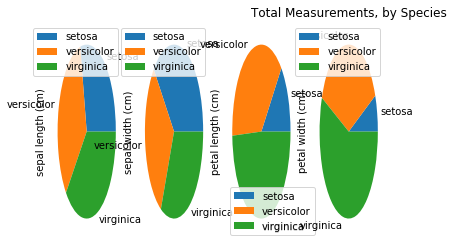

In [3]:
# Pie charts

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.title('Breakdown for ' + var, fontsize=25)
plt.savefig('iris_pie_for_one_variable.jpg')
plt.show()
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True)
plt.title('Total Measurements, by Species')
plt.savefig('iris_pie_for_each_variable.jpg')
plt.show()
plt.close()

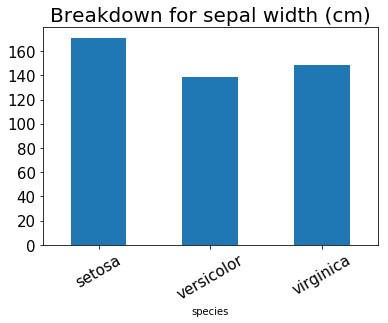

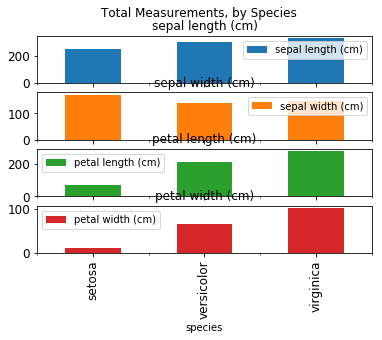

In [4]:
# Bar charts

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15,
rot=30)
plt.title('Breakdown for ' + var, fontsize=20)
plt.savefig('iris_bar_for_one_variable.jpg')
plt.show()
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
    kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')
plt.savefig('iris_bar_for_each_variable.jpg')
plt.show()
plt.close()

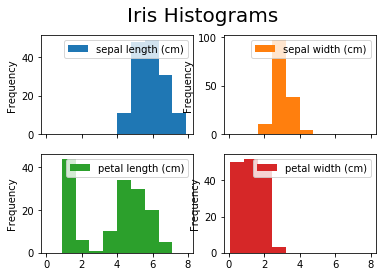

In [5]:
# Histograms

df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()
for spec in df['species'].unique():
  forspec = df[df['species']==spec]
  forspec['petal length (cm)'].plot(
    kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.savefig('iris_hist_by_spec.jpg')

In [6]:
# Means, quantiles, etc.

col = df['petal length (cm)']
Average = col.mean()
print("Average =",Average)
Std = col.std()
print("Standard Deviation =",Std)
Median = col.quantile(0.5)
print("Median =",Median)
Percentile25 = col.quantile(0.25)
print("Percentile25 =",Percentile25)
Percentile75 = col.quantile(0.75)
print("Percentile75 =",Percentile75)

col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()
print("Clean Average =",Clean_Avg)

Average = 3.7586666666666693
Standard Deviation = 1.7644204199522617
Median = 4.35
Percentile25 = 1.6
Percentile75 = 5.1
Clean Average = 4.0984375


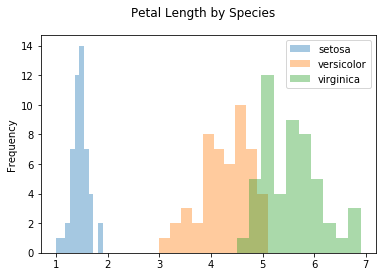

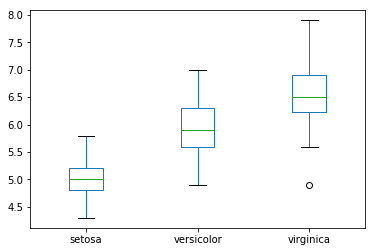

In [7]:
# Boxplots

col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

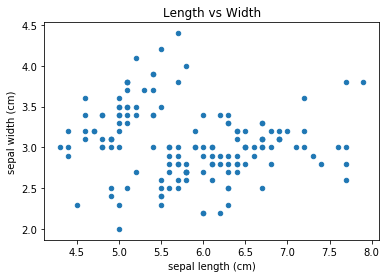

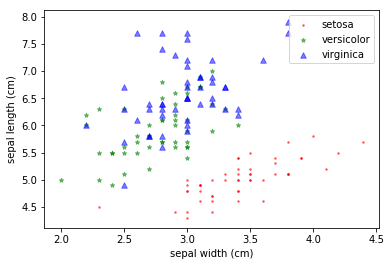

In [8]:
# Scatterplots

df.plot(kind="scatter",
    x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()

plt.close()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
  ddf = df[df['species']==spec]
  ddf.plot(kind="scatter",
    x="sepal width (cm)", y="sepal length (cm)",
    alpha=0.5, s=10*(i+1), ax=ax,
    color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

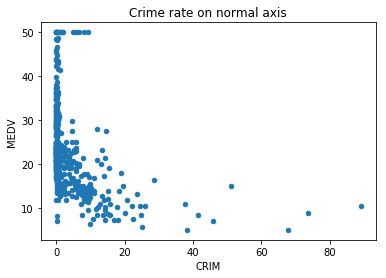

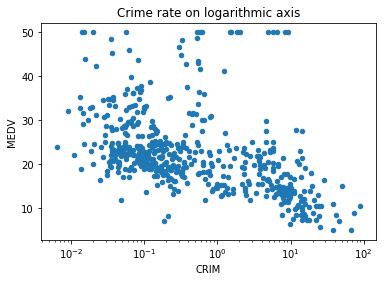

In [10]:
# Scatterplots with logs

import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title('Crime rate on normal axis')
plt.show()
# Scatterplot with x-axis logarithmic
df.plot(x='CRIM', y='MEDV', kind='scatter', logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()

C:\Users\Soumya V\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


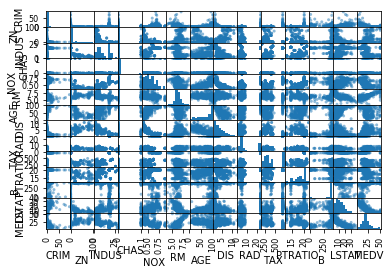

In [11]:
# Scatter matrices

plt.close()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

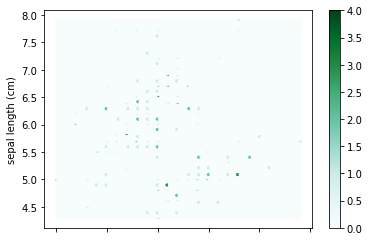

In [12]:
# Heatmaps

df = get_iris_df()
plt.close()
df.plot(kind="hexbin", x="sepal width (cm)", y="sepal length (cm)")
plt.show()

C:\Users\Soumya V\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


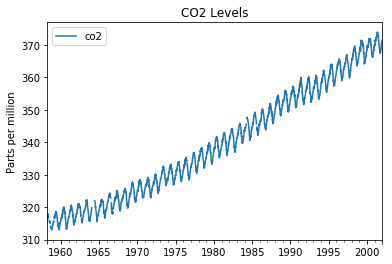

In [13]:
# CO2 time series

import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

C:\Users\Soumya V\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


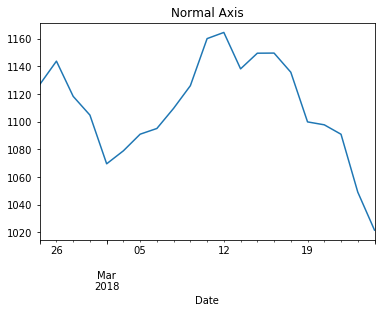

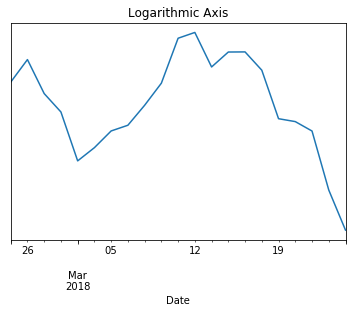

In [19]:
# Stock price

import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Get raw CSV data from the web
URL = ("http://ichart.finance.yahoo.com/" +
    "table.csv?s=GOOG&c=2000")
dat = urllib.urlopen(URL).read()
open('GOOG.csv','w').write(dat)
# Make DataFrame, w timestamp as the index
df = pd.read_csv('GOOG.csv')
df.index = df['Date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()